In [1]:
import nest                                                          # import NEST module
import matplotlib.pyplot as plt                                      # for plotting
from pynestml.frontend.pynestml_frontend import generate_nest_target # NESTML


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Oct 17 2024 06:44:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# compile nestml model (needs to be done only once)
generate_nest_target(input_path="models/iaf_psc_exp.nestml",
                     target_path="targets/",
                     suffix="_nestml",                     
                     logging_level='ERROR',
                     install_path='.')    

# install resulting NESTML module to make models available in NEST
nest.Install('nestmlmodule') 


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Oct 17 2024 06:44:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

CMake Warning (dev) at CMakeLists.txt:93 (project):
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.

-- The CXX compiler identification is GNU 14.1.1
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
nestmlmodule Configuration Summary
-------------------------


Oct 17 09:05:52 Install [Info]: 
    loaded module nestmlmodule

Oct 17 09:05:52 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 17 09:05:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Oct 17 09:05:52 SimulationManager::run [Info]: 
    Simulation finished.


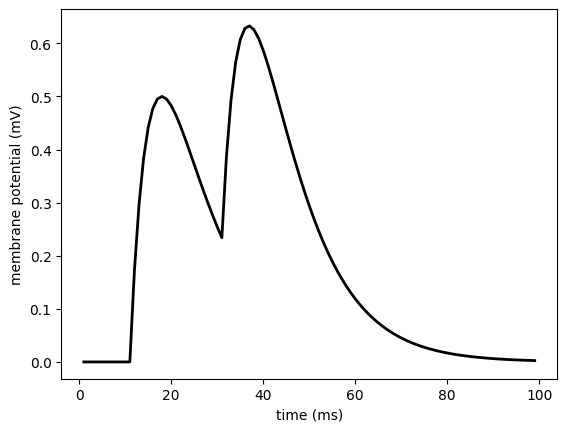

In [3]:
%matplotlib inline
nest.ResetKernel() # reset simulation kernel 
nest.Install('nestmlmodule') 

neuron=nest.Create('iaf_psc_exp_nestml') # create LIF neuron with exponential synaptic currents

# create a spike generator, and set it up to create two spikes at 10 and 30ms
spikegenerator=nest.Create('spike_generator', params={'spike_times': [10.,30.]}) 

# create multimeter and set it up to record the membrane potential V_m
multimeter=nest.Create('multimeter', {'record_from': ['V_m']})

# connect spike generator with neuron with synaptic weight 100 pA
nest.Connect(spikegenerator, neuron,syn_spec={'weight': 50.0})

# connect multimeter to the neuron
nest.Connect(multimeter, neuron)  

nest.Simulate(100.) # run simulation for 100ms

# read out recording time and voltage from voltmeter
times = multimeter.events['times']
voltage = multimeter.events['V_m']

# plot results
plt.figure(1)
plt.clf()
plt.plot(times, voltage, 'k-', lw=2)
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.show()